In [63]:
import pandas as pd
import numpy as np

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('Train.csv')

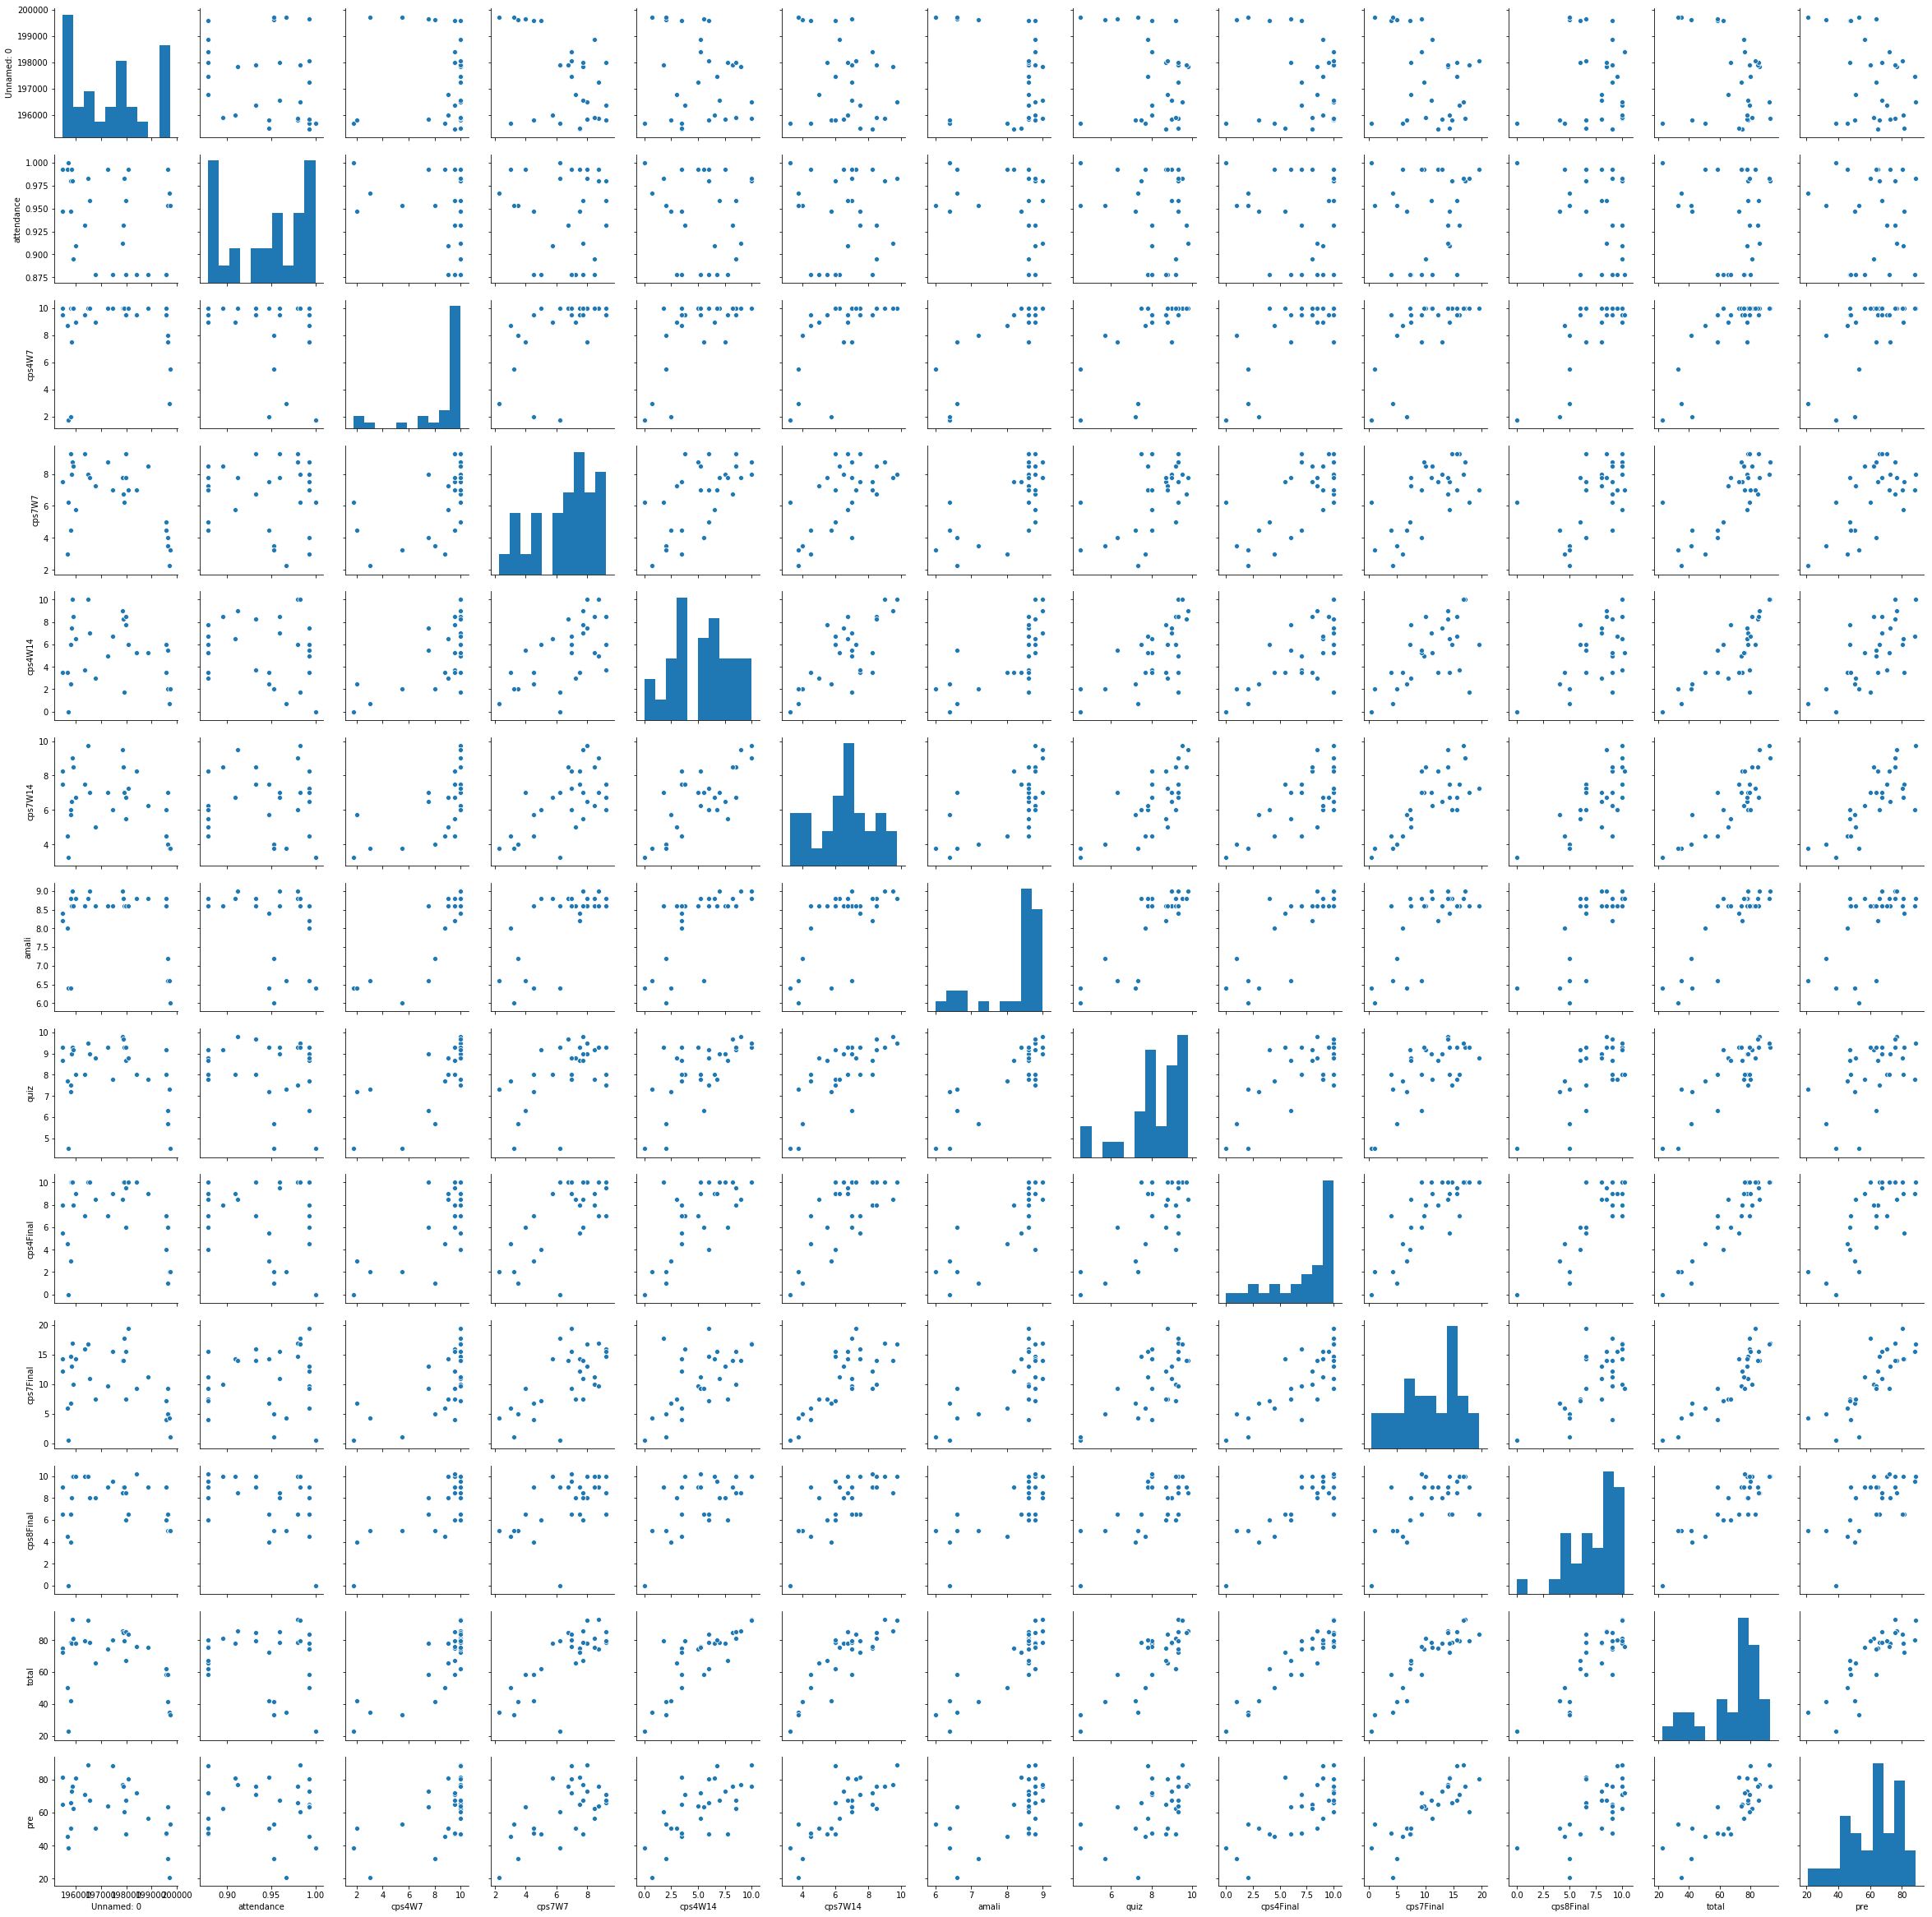

In [66]:
sns.pairplot(df)

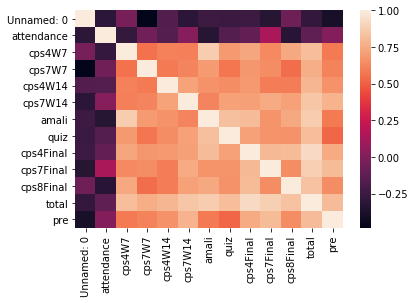

In [67]:
sns.heatmap(df.corr())

In [68]:
df.columns

Index(['Unnamed: 0', 'attendance', 'cps4W7', 'cps7W7', 'cps4W14', 'cps7W14',
       'amali', 'quiz', 'cps4Final', 'cps7Final', 'cps8Final', 'total', 'pre'],
      dtype='object')

In [69]:
X = df[['cps4W7', 'cps7W7','cps4W14', 'cps7W14',
       'amali', 'quiz']]

In [70]:
y =df[['total']]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
print(lm.intercept_) 

[-27.16531619]


In [77]:
lm.coef_

array([[1.86143592, 1.83016711, 0.8214997 , 3.28017831, 2.9920179 ,
        2.09597191]])

In [78]:
predictions = lm.predict(X_test)

In [79]:
y_test

,total
27,58.65
15,80.15
23,75.85
17,85.00
8,81.30
9,78.05
28,34.90
24,62.25


In [80]:
predictions

array([[54.54755938],
       [71.56634049],
       [74.49778976],
       [85.12224425],
       [86.88402209],
       [70.68955245],
       [30.5015741 ],
       [70.82264574]])

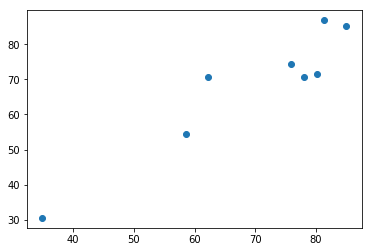

In [81]:
plt.scatter(y_test,predictions) #Linear very nice

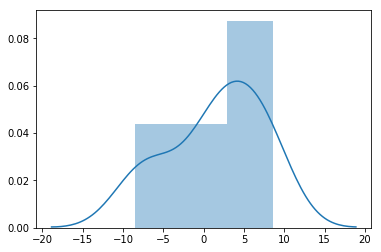

In [82]:
sns.distplot(y_test-predictions) #Uniform very noice

In [83]:
from sklearn import metrics
metrics.explained_variance_score(y_test,predictions)

0.871331779922598

In [84]:
metrics.mean_absolute_error(y_test,predictions)



5.009511989167248

In [85]:
metrics.mean_squared_error(y_test,predictions)


33.81831777670592

In [86]:

np.sqrt(metrics.mean_squared_error(y_test,predictions))

5.815351904803863

In [87]:
from sklearn.externals import joblib

In [88]:
filename = '.sav'
joblib.dump(lm, filename)

['PredictUsingCarryMark.sav']

In [89]:
 from sklearn.metrics import accuracy_score
y_true = y_test
y_pred =predictions

In [90]:
accuracy_score(y_true, y_pred)

ValueError: continuous is not supported